### import numpy as np
import numpy
from numpy.linalg import inv

In [2]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0+ self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0+ self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0 
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0 
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0           
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        reward = [0]*100
        reward[99] = 1.0
        self.reward = reward
        



In [3]:
from cvxopt import matrix, solvers

In [44]:
def irl(state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy):
    """
    - state_num: number of state = 100;
    - PU, PD, PL, PR: four transition probability matrix 100*100;
    - lambda_num: adjustable pernalty coefficient;
    - discount: disc;
    - Rmax: max value in T_rewardf;
    - policy: policy function 10*10, values should be in [0, 1, 2, 3];
    
     should return the estimated reward function of ground truth reward function 1 or 2.
    
    """
    # change reward function dimension to 100*1
    policy = np.reshape(policy,(100,1))
    #print(policy[1])
    
    #action set
    A = [0, 1, 2, 3]
    
    # transfer four transition probability matrix to a three dimension probability tensor 
    P = [[[0]*100]*100]*4
    P[0] = PU
    P[1] = PD
    P[2] = PL
    P[3] = PR
    #P = np.asarray(P)
    #print(P[3][5])
    
    # a handle for numtiplication in P.
    def multiply(state, other_action):
        #print(state)
        #policy_action = policy[state][0]
        policy_action = int(policy[state])
        mul = - np.dot(P[policy_action][state] - P[other_action][state]
        ,inv(np.eye(state_num) - discount * P[policy_action]))
        #print(mul)
        return mul
    
    # D inclusing following parts: [D00 D01 D02]
    #                              [D10 D11 D12]
    #                              [D20 D21 D22]
    #                              [D30 D31 D32]
    #                              [D40 D41 D42]
    #                              [D50 D51 D52]
    
    #D00 (300*100)
    D00 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])
    D01 = np.vstack([np.eye(1, 100, s) for s in range(100) for a in [element for element in A if element!=policy[s][0]]])
    D02 = np.zeros((300, 100))
    #D03 = np.zeros((300, 100))
    
    D0 = np.hstack((D00, D01, D02))
    
    
    D10 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])    
    D11 = np.zeros((300, 100))
    D12 = np.zeros((300, 100))
    #D13 = np.zeros((300, 100))
    
    D1 = np.hstack((D10, D11, D12))
    
    D20 = np.eye(100 , 100)
    D21 = np.zeros((100, 100))
    D22 = - np.eye(100 , 100)
    #D23 = np.zeros((100, 100))
      
    D2 = np.hstack((D20, D21, D22))
    
    D30 = - np.eye(100 , 100)
    D31 = np.zeros((100, 100))
    D32 = - np.eye(100 , 100)
    #D33 = np.zeros((100, 100))
      
    D3 = np.hstack((D30, D31, D32))
    
    D40 = np.eye(100 , 100)
    D41 = np.zeros((100, 100))
    D42 = np.zeros((100, 100))
    #D43 = - Rmax * np.eye(100 , 100)
      
    D4 = np.hstack((D40, D41, D42))
        
    D50 = - np.eye(100 , 100)
    D51 = np.zeros((100, 100))
    D52 = np.zeros((100, 100))
    #D53 = - Rmax * np.eye(100 , 100)
      
    D5 = np.hstack((D50, D51, D52))  
        
    D = np.vstack((D0, D1, D2, D3, D4, D5))
    #print(D.shape)
    CT = -np.hstack((np.zeros(100), np.ones(100), -lambda_num * np.ones(100)))
    
    b = np.zeros((800, 1))
    bmax = Rmax * np.ones(200)
    b = np.append(b, bmax)
    #print(b.shape)
    
    D = matrix(D)
    CT = matrix(CT)
    b = matrix(b)
    sol=solvers.lp(CT,D,b)
    r = np.asarray(sol["x"][:100], dtype=np.double)
    #print(len(sol['x']))
    return r.reshape((100,))
    #return sol['x'][:100]
    
    

In [68]:
env = Environment(w =0.1,disc = 0.8) 

# action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'.
P1 = [[1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

P2 = [[1, 1, 1, 2, 2, 3, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 0, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 0, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 1, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
      [3, 3, 3, 1, 1, 1, 1, 1, 1, 1],
      [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

#state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy
#R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.0, 0.8, 1, P1) 
#print(R)


In [69]:
import matplotlib.pyplot as plt
import math
 # optimal function# optima 
def value_iteration(env,R):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     


def optimal_policy(env,R):
    V=value_iteration(env,R)
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumd>maxnum):
                arrow[i][j]=1
                maxnum=sumd
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            if(suml>maxnum):
                arrow[i][j]=2
                maxnum=suml
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumr>maxnum):
                arrow[i][j]=3
                maxnum=sumr 
    #print(arrow)
    return arrow
    

In [70]:
def s_range(start, end, step):
    while start <= end:
        yield start
        start += step

accuracy = []
for i in s_range(0, 5, 0.01):
    print(i)
    R = irl(100, env.PU, env.PD, env.PL, env.PR , i, 0.8, 1, P1) 
    arrow = optimal_policy(Environment(w=0.1,disc=0.8),R)
    P = np.asarray(P1)
    acc = np.sum(arrow == P)
    accuracy = np.append(accuracy, acc/100)

print(accuracy)

0
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1686e+01 -1.0212e+02  4e+02  7e-01  5e+00  1e+00
 2: -2.0092e+01 -8.0064e+01  3e+02  5e-01  3e+00  8e-01
 3: -3.0098e+01 -5.8419e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.4817e+01 -4.9165e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.7168e+01 -4.5524e+01  4e+01  7e-02  5e-01  9e-02
 6: -3.8941e+01 -4.2762e+01  2e+01  3e-02  2e-01  4e-02
 7: -4.0382e+01 -4.1586e+01  5e+00  1e-02  7e-02  6e-03
 8: -4.1014e+01 -4.1546e+01  2e+00  4e-03  3e-02  3e-03
 9: -4.1048e+01 -4.1541e+01  2e+00  4e-03  3e-02  2e-03
10: -4.1291e+01 -4.1535e+01  1e+00  2e-03  1e-02  1e-03
11: -4.1350e+01 -4.1515e+01  7e-01  1e-03  9e-03  8e-04
12: -4.1419e+01 -4.1496e+01  3e-01  6e-04  4e-03  3e-04
13: -4.1473e+01 -4.1491e+01  8e-02  1e-04  1e-03  8e-05
14: -4.1479e+01 -4.1487e+01  3e-02  6e-05  4e-04  3e-05
15: -4.1480e+01 -4.1486e+01  3e-02  5e-05  3e-04  3e-05
16: -4.1481e+01 -4.1485e+01  2e-02  3e-05  2e-04

27: -3.8117e+01 -3.8117e+01  1e-03  2e-06  1e-05  1e-06
28: -3.8117e+01 -3.8117e+01  1e-04  2e-07  1e-06  1e-07
29: -3.8117e+01 -3.8117e+01  1e-05  2e-08  1e-07  1e-08
30: -3.8117e+01 -3.8117e+01  3e-06  4e-09  3e-08  3e-09
Optimal solution found.
0.05
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.4670e+00 -9.5830e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.6870e+01 -7.4842e+01  2e+02  5e-01  3e+00  7e-01
 3: -2.5796e+01 -5.4217e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.0395e+01 -4.4606e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.2840e+01 -4.0897e+01  3e+01  7e-02  4e-01  8e-02
 6: -3.4481e+01 -3.8859e+01  2e+01  4e-02  2e-01  4e-02
 7: -3.6488e+01 -3.7541e+01  4e+00  9e-03  6e-02  6e-03
 8: -3.6844e+01 -3.7458e+01  2e+00  5e-03  3e-02  3e-03
 9: -3.6933e+01 -3.7370e+01  2e+00  4e-03  2e-02  2e-03
10: -3.7097e+01 -3.7377e+01  1e+00  2e-03  2e-02  1e-03
11: -3.7142e+01 -3.7360e+01  8e-01  2e-03  1e-02  9e-04
12: -3.7294e+01 -3.73

 7: -3.2717e+01 -3.3870e+01  4e+00  9e-03  6e-02  7e-03
 8: -3.2958e+01 -3.3727e+01  3e+00  6e-03  4e-02  4e-03
 9: -3.3263e+01 -3.3644e+01  1e+00  3e-03  2e-02  2e-03
10: -3.3372e+01 -3.3635e+01  1e+00  2e-03  1e-02  1e-03
11: -3.3465e+01 -3.3592e+01  5e-01  1e-03  7e-03  5e-04
12: -3.3538e+01 -3.3583e+01  2e-01  4e-04  2e-03  2e-04
13: -3.3545e+01 -3.3578e+01  1e-01  3e-04  2e-03  1e-04
14: -3.3545e+01 -3.3576e+01  1e-01  2e-04  2e-03  1e-04
15: -3.3546e+01 -3.3572e+01  1e-01  2e-04  1e-03  1e-04
16: -3.3547e+01 -3.3571e+01  1e-01  2e-04  1e-03  1e-04
17: -3.3553e+01 -3.3563e+01  5e-02  9e-05  6e-04  4e-05
18: -3.3555e+01 -3.3560e+01  2e-02  4e-05  2e-04  2e-05
19: -3.3555e+01 -3.3560e+01  2e-02  4e-05  2e-04  2e-05
20: -3.3556e+01 -3.3559e+01  1e-02  2e-05  1e-04  1e-05
21: -3.3556e+01 -3.3557e+01  2e-03  4e-06  2e-05  2e-06
22: -3.3557e+01 -3.3557e+01  3e-04  5e-07  3e-06  3e-07
23: -3.3557e+01 -3.3557e+01  1e-05  3e-08  2e-07  1e-08
24: -3.3557e+01 -3.3557e+01  2e-06  4e-09  3e-08

 4: -2.3278e+01 -3.5464e+01  5e+01  1e-01  7e-01  1e-01
 5: -2.4989e+01 -3.2257e+01  3e+01  6e-02  4e-01  7e-02
 6: -2.7034e+01 -3.0618e+01  1e+01  3e-02  2e-01  3e-02
 7: -2.8314e+01 -2.9549e+01  5e+00  1e-02  7e-02  8e-03
 8: -2.8713e+01 -2.9376e+01  2e+00  5e-03  4e-02  4e-03
 9: -2.8963e+01 -2.9264e+01  1e+00  2e-03  2e-02  2e-03
10: -2.9094e+01 -2.9208e+01  4e-01  9e-04  6e-03  6e-04
11: -2.9115e+01 -2.9198e+01  3e-01  7e-04  5e-03  4e-04
12: -2.9133e+01 -2.9182e+01  2e-01  4e-04  3e-03  2e-04
13: -2.9130e+01 -2.9177e+01  2e-01  4e-04  3e-03  2e-04
14: -2.9130e+01 -2.9171e+01  2e-01  3e-04  2e-03  2e-04
15: -2.9143e+01 -2.9158e+01  7e-02  1e-04  8e-04  7e-05
16: -2.9143e+01 -2.9158e+01  7e-02  1e-04  8e-04  7e-05
17: -2.9145e+01 -2.9156e+01  5e-02  8e-05  6e-04  5e-05
18: -2.9148e+01 -2.9154e+01  3e-02  5e-05  3e-04  3e-05
19: -2.9149e+01 -2.9150e+01  3e-03  5e-06  3e-05  2e-06
20: -2.9149e+01 -2.9149e+01  4e-04  7e-07  5e-06  4e-07
21: -2.9149e+01 -2.9149e+01  5e-05  9e-08  6e-07

 8: -2.4613e+01 -2.5197e+01  2e+00  5e-03  3e-02  4e-03
 9: -2.4832e+01 -2.5048e+01  8e-01  2e-03  1e-02  1e-03
10: -2.4907e+01 -2.5002e+01  4e-01  8e-04  5e-03  5e-04
11: -2.4900e+01 -2.4994e+01  4e-01  8e-04  5e-03  5e-04
12: -2.4905e+01 -2.4980e+01  3e-01  6e-04  4e-03  4e-04
13: -2.4913e+01 -2.4961e+01  2e-01  4e-04  3e-03  2e-04
14: -2.4926e+01 -2.4947e+01  9e-02  2e-04  1e-03  1e-04
15: -2.4931e+01 -2.4942e+01  4e-02  9e-05  6e-04  5e-05
16: -2.4932e+01 -2.4939e+01  3e-02  6e-05  4e-04  3e-05
17: -2.4932e+01 -2.4937e+01  2e-02  4e-05  3e-04  2e-05
18: -2.4933e+01 -2.4934e+01  5e-03  1e-05  7e-05  5e-06
19: -2.4933e+01 -2.4934e+01  8e-04  2e-06  1e-05  8e-07
20: -2.4933e+01 -2.4933e+01  1e-04  2e-07  1e-06  1e-07
21: -2.4933e+01 -2.4933e+01  2e-06  3e-09  2e-08  2e-09
Optimal solution found.
0.23000000000000007
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.0357e+00 -7.7996e+01  3e+02  6e-01  4e+00  1e+00
 2: -8

 9: -2.0643e+01 -2.1039e+01  2e+00  3e-03  2e-02  2e-03
10: -2.0730e+01 -2.0991e+01  1e+00  2e-03  1e-02  1e-03
11: -2.0783e+01 -2.0950e+01  7e-01  1e-03  9e-03  7e-04
12: -2.0832e+01 -2.0918e+01  3e-01  7e-04  5e-03  4e-04
13: -2.0843e+01 -2.0908e+01  3e-01  5e-04  3e-03  3e-04
14: -2.0852e+01 -2.0898e+01  2e-01  4e-04  2e-03  2e-04
15: -2.0870e+01 -2.0884e+01  6e-02  1e-04  8e-04  6e-05
16: -2.0870e+01 -2.0884e+01  6e-02  1e-04  7e-04  6e-05
17: -2.0873e+01 -2.0878e+01  2e-02  4e-05  3e-04  2e-05
18: -2.0875e+01 -2.0876e+01  3e-03  6e-06  4e-05  3e-06
19: -2.0875e+01 -2.0876e+01  4e-04  9e-07  6e-06  4e-07
20: -2.0875e+01 -2.0876e+01  8e-05  2e-07  1e-06  8e-08
21: -2.0875e+01 -2.0875e+01  4e-06  9e-09  6e-08  4e-09
Optimal solution found.
0.2900000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.9103e+00 -7.3383e+01  3e+02  6e-01  4e+00  1e+00
 2: -7.1064e+00 -5.5589e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.

0.35000000000000014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.9869e+00 -6.9009e+01  2e+02  6e-01  4e+00  1e+00
 2: -5.5489e+00 -5.1553e+01  2e+02  4e-01  2e+00  7e-01
 3: -8.5865e+00 -3.5730e+01  1e+02  2e-01  1e+00  4e-01
 4: -1.3369e+01 -2.2113e+01  3e+01  7e-02  5e-01  1e-01
 5: -1.4362e+01 -2.0826e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.5245e+01 -1.7996e+01  1e+01  2e-02  1e-01  1e-02
 7: -1.6278e+01 -1.7044e+01  3e+00  6e-03  4e-02  3e-03
 8: -1.6432e+01 -1.6844e+01  1e+00  3e-03  2e-02  2e-03
 9: -1.6582e+01 -1.6724e+01  5e-01  1e-03  7e-03  5e-04
10: -1.6637e+01 -1.6676e+01  1e-01  3e-04  2e-03  1e-04
11: -1.6650e+01 -1.6665e+01  5e-02  1e-04  8e-04  5e-05
12: -1.6657e+01 -1.6660e+01  1e-02  2e-05  2e-04  1e-05
13: -1.6658e+01 -1.6659e+01  2e-03  5e-06  3e-05  2e-06
14: -1.6658e+01 -1.6658e+01  4e-04  1e-06  6e-06  4e-07
15: -1.6658e+01 -1.6658e+01  9e-05  2e-07  1e-06  9e-08
16: -1.6658e+01 -1.6658e+01  2

0.4300000000000002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.0126e+00 -6.3475e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.7911e+00 -4.6309e+01  2e+02  3e-01  2e+00  7e-01
 3: -5.4756e+00 -3.1652e+01  1e+02  2e-01  1e+00  4e-01
 4: -9.1277e+00 -1.9519e+01  4e+01  9e-02  5e-01  1e-01
 5: -1.0563e+01 -1.6152e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.1312e+01 -1.4891e+01  1e+01  3e-02  2e-01  4e-02
 7: -1.1922e+01 -1.3200e+01  4e+00  1e-02  6e-02  8e-03
 8: -1.2232e+01 -1.2832e+01  2e+00  5e-03  3e-02  2e-03
 9: -1.2362e+01 -1.2694e+01  1e+00  3e-03  2e-02  1e-03
10: -1.2410e+01 -1.2646e+01  8e-01  2e-03  1e-02  8e-04
11: -1.2504e+01 -1.2559e+01  2e-01  4e-04  3e-03  2e-04
12: -1.2524e+01 -1.2537e+01  5e-02  1e-04  7e-04  5e-05
13: -1.2529e+01 -1.2532e+01  1e-02  2e-05  1e-04  1e-05
14: -1.2530e+01 -1.2530e+01  2e-03  4e-06  2e-05  2e-06
15: -1.2530e+01 -1.2530e+01  4e-04  1e-06  6e-06  4e-07
16: -1.2530e+01 -1.2530e+01  4e

0.5100000000000002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.6939e-01 -5.9181e+01  2e+02  5e-01  3e+00  1e+00
 2: -2.3352e+00 -4.1466e+01  1e+02  3e-01  2e+00  7e-01
 3: -3.0389e+00 -2.7349e+01  8e+01  2e-01  1e+00  3e-01
 4: -6.0341e+00 -1.5367e+01  3e+01  8e-02  5e-01  1e-01
 5: -6.9699e+00 -1.1828e+01  2e+01  4e-02  2e-01  6e-02
 6: -7.4788e+00 -1.0780e+01  1e+01  3e-02  2e-01  3e-02
 7: -7.9740e+00 -9.7603e+00  6e+00  1e-02  9e-02  1e-02
 8: -8.3105e+00 -9.0005e+00  2e+00  6e-03  3e-02  2e-03
 9: -8.5262e+00 -8.7688e+00  8e-01  2e-03  1e-02  8e-04
10: -8.5992e+00 -8.6850e+00  3e-01  7e-04  4e-03  3e-04
11: -8.6270e+00 -8.6507e+00  8e-02  2e-04  1e-03  8e-05
12: -8.6348e+00 -8.6417e+00  2e-02  6e-05  3e-04  2e-05
13: -8.6371e+00 -8.6385e+00  5e-03  1e-05  7e-05  5e-06
14: -8.6375e+00 -8.6380e+00  2e-03  4e-06  2e-05  2e-06
15: -8.6376e+00 -8.6378e+00  5e-04  1e-06  7e-06  5e-07
16: -8.6377e+00 -8.6377e+00  7e

 9: -5.6933e+00 -5.7622e+00  2e-01  6e-04  3e-03  2e-04
10: -5.7103e+00 -5.7295e+00  6e-02  2e-04  9e-04  6e-05
11: -5.7155e+00 -5.7189e+00  1e-02  3e-05  2e-04  1e-05
12: -5.7162e+00 -5.7169e+00  2e-03  6e-06  3e-05  2e-06
13: -5.7164e+00 -5.7166e+00  5e-04  1e-06  9e-06  5e-07
14: -5.7164e+00 -5.7165e+00  1e-04  4e-07  2e-06  1e-07
15: -5.7164e+00 -5.7165e+00  5e-05  2e-07  9e-07  6e-08
16: -5.7164e+00 -5.7165e+00  5e-06  1e-08  8e-08  5e-09
Optimal solution found.
0.5900000000000003
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.8786e-01 -5.8977e+01  2e+02  5e-01  3e+00  1e+00
 2: -1.1730e+00 -3.7756e+01  1e+02  3e-01  2e+00  6e-01
 3: -1.1790e+00 -2.3017e+01  7e+01  2e-01  1e+00  3e-01
 4: -3.8518e+00 -1.0322e+01  2e+01  5e-02  3e-01  8e-02
 5: -4.4396e+00 -7.6177e+00  9e+00  3e-02  2e-01  3e-02
 6: -4.9623e+00 -6.2246e+00  4e+00  1e-02  6e-02  1e-02
 7: -5.2036e+00 -5.7127e+00  1e+00  4e-03  2e-02  3e-03
 8: -5.

0.6600000000000004
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  6.5403e-01 -5.8776e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.2821e-01 -3.4120e+01  1e+02  3e-01  2e+00  6e-01
 3:  2.6306e-02 -1.8288e+01  6e+01  2e-01  8e-01  2e-01
 4: -2.2468e+00 -7.3415e+00  1e+01  4e-02  2e-01  6e-02
 5: -3.0085e+00 -4.9503e+00  5e+00  2e-02  9e-02  2e-02
 6: -3.2847e+00 -3.9752e+00  2e+00  6e-03  3e-02  3e-03
 7: -3.3240e+00 -3.7772e+00  1e+00  4e-03  2e-02  1e-03
 8: -3.4318e+00 -3.6094e+00  5e-01  1e-03  8e-03  5e-04
 9: -3.4641e+00 -3.5198e+00  1e-01  5e-04  3e-03  2e-04
10: -3.4741e+00 -3.4937e+00  5e-02  2e-04  9e-04  5e-05
11: -3.4773e+00 -3.4833e+00  2e-02  5e-05  3e-04  2e-05
12: -3.4782e+00 -3.4795e+00  3e-03  1e-05  6e-05  3e-06
13: -3.4784e+00 -3.4786e+00  6e-04  2e-06  1e-05  6e-07
14: -3.4784e+00 -3.4785e+00  2e-04  7e-07  4e-06  2e-07
15: -3.4784e+00 -3.4784e+00  9e-05  3e-07  2e-06  9e-08
16: -3.4784e+00 -3.4784e+00  2e

0.7300000000000004
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  9.4000e-01 -5.8532e+01  2e+02  5e-01  3e+00  1e+00
 2:  3.9419e-01 -3.0092e+01  1e+02  3e-01  1e+00  5e-01
 3:  8.5669e-01 -1.3646e+01  4e+01  1e-01  6e-01  2e-01
 4: -8.6652e-01 -5.3599e+00  1e+01  4e-02  2e-01  5e-02
 5: -1.4628e+00 -3.6427e+00  6e+00  2e-02  1e-01  2e-02
 6: -1.6753e+00 -2.8866e+00  3e+00  1e-02  5e-02  9e-03
 7: -1.7464e+00 -2.6367e+00  2e+00  7e-03  4e-02  4e-03
 8: -1.8810e+00 -2.1938e+00  8e-01  3e-03  1e-02  8e-04
 9: -1.9270e+00 -2.0762e+00  4e-01  1e-03  7e-03  4e-04
10: -1.9461e+00 -2.0270e+00  2e-01  7e-04  4e-03  2e-04
11: -1.9611e+00 -1.9757e+00  4e-02  1e-04  6e-04  4e-05
12: -1.9631e+00 -1.9670e+00  1e-02  3e-05  2e-04  1e-05
13: -1.9637e+00 -1.9643e+00  2e-03  5e-06  3e-05  2e-06
14: -1.9637e+00 -1.9640e+00  6e-04  2e-06  1e-05  6e-07
15: -1.9637e+00 -1.9638e+00  1e-04  5e-07  3e-06  1e-07
16: -1.9637e+00 -1.9638e+00  2e

0.8000000000000005
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.1707e+00 -5.8229e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.0329e+00 -2.8644e+01  9e+01  2e-01  1e+00  5e-01
 3:  6.9570e-01 -1.0721e+01  3e+01  9e-02  5e-01  1e-01
 4:  2.6107e-02 -4.3621e+00  1e+01  4e-02  2e-01  5e-02
 5: -1.3766e-01 -3.2750e+00  8e+00  3e-02  1e-01  3e-02
 6: -2.5365e-01 -1.7967e+00  4e+00  1e-02  7e-02  9e-03
 7: -4.4183e-01 -1.1908e+00  2e+00  6e-03  3e-02  3e-03
 8: -5.3793e-01 -8.4779e-01  8e-01  3e-03  1e-02  1e-03
 9: -5.6462e-01 -7.4768e-01  4e-01  1e-03  8e-03  6e-04
10: -5.8729e-01 -6.4680e-01  1e-01  5e-04  3e-03  2e-04
11: -5.9465e-01 -6.1515e-01  5e-02  2e-04  9e-04  6e-05
12: -5.9645e-01 -6.0731e-01  3e-02  9e-05  5e-04  3e-05
13: -5.9718e-01 -6.0175e-01  1e-02  4e-05  2e-04  1e-05
14: -5.9751e-01 -5.9937e-01  5e-03  2e-05  8e-05  5e-06
15: -5.9767e-01 -5.9803e-01  9e-04  3e-06  2e-05  9e-07
16: -5.9769e-01 -5.9777e-01  2e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.3908e+00 -5.7941e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.5859e+00 -2.7157e+01  9e+01  2e-01  1e+00  5e-01
 3:  8.5622e-01 -8.3006e+00  2e+01  8e-02  4e-01  1e-01
 4:  6.7107e-01 -4.3963e+00  1e+01  4e-02  2e-01  7e-02
 5:  9.3688e-01 -1.3040e+00  5e+00  2e-02  9e-02  1e-02
 6:  4.8033e-01 -1.2398e+00  4e+00  1e-02  7e-02  5e-03
 7:  2.2553e-01 -3.0843e-01  1e+00  4e-03  2e-02  1e-03
 8:  3.2803e-02 -2.0208e-02  9e-02  4e-04  2e-03  9e-05
 9:  3.7140e-04 -2.4427e-04  1e-03  5e-06  3e-05  1e-06
10:  3.7132e-06 -2.4422e-06  1e-05  5e-08  3e-07  1e-08
11:  3.7132e-08 -2.4422e-08  1e-07  5e-10  3e-09  1e-10
12:  3.7132e-10 -2.4422e-10  1e-09  5e-12  3e-11  1e-12
Optimal solution found.
0.8900000000000006
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.4151e+00 -5.8072e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.64

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6658e+00 -5.9241e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.1473e+00 -2.4583e+01  8e+01  2e-01  1e+00  5e-01
 3:  1.6674e+00 -6.2837e+00  2e+01  7e-02  3e-01  1e-01
 4:  1.1407e+00 -2.6730e+00  9e+00  3e-02  1e-01  5e-02
 5:  3.3442e-01 -2.8355e-01  1e+00  5e-03  2e-02  1e-03
 6:  5.1296e-03 -3.6575e-03  2e-02  7e-05  3e-04  2e-05
 7:  5.1263e-05 -3.6558e-05  2e-04  7e-07  3e-06  2e-07
 8:  5.1262e-07 -3.6558e-07  2e-06  7e-09  3e-08  2e-09
 9:  5.1262e-09 -3.6558e-09  2e-08  7e-11  3e-10  2e-11
Optimal solution found.
1.0100000000000007
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6879e+00 -5.9323e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.1847e+00 -2.4340e+01  8e+01  2e-01  1e+00  4e-01
 3:  1.7060e+00 -6.0977e+00  2e+01  6e-02  3e-01  1e-01
 4:  1.0117e+00 -1.8438e+00  6e+00  2e-02  1e-01  3e-02
 5:  1.84

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9580e+00 -6.0001e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.6311e+00 -2.1633e+01  7e+01  2e-01  9e-01  4e-01
 3:  1.9335e+00 -4.6807e+00  2e+01  5e-02  2e-01  8e-02
 4:  5.2310e-01 -5.1144e-01  2e+00  8e-03  4e-02  3e-03
 5:  9.1282e-03 -7.6053e-03  3e-02  1e-04  6e-04  4e-05
 6:  9.1227e-05 -7.6017e-05  3e-04  1e-06  6e-06  4e-07
 7:  9.1226e-07 -7.6016e-07  3e-06  1e-08  6e-08  4e-09
 8:  9.1226e-09 -7.6016e-09  3e-08  1e-10  6e-10  4e-11
Optimal solution found.
1.1400000000000008
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9814e+00 -6.0033e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.6643e+00 -2.1406e+01  7e+01  2e-01  9e-01  4e-01
 3:  1.9493e+00 -4.9117e+00  2e+01  6e-02  3e-01  9e-02
 4:  5.0293e-01 -4.6983e-01  2e+00  8e-03  4e-02  3e-03
 5:  7.9332e-03 -6.7405e-03  3e-02  1e-04  5e-04  4e-05
 6:  7.92

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.3073e+00 -6.0127e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.0153e+00 -1.8378e+01  6e+01  2e-01  7e-01  4e-01
 3:  1.9155e+00 -4.9930e+00  2e+01  6e-02  2e-01  9e-02
 4:  3.4261e-01 -4.2385e-01  2e+00  6e-03  3e-02  6e-03
 5:  4.7692e-03 -5.0312e-03  2e-02  8e-05  3e-04  6e-05
 6:  4.7673e-05 -5.0293e-05  2e-04  8e-07  3e-06  6e-07
 7:  4.7673e-07 -5.0293e-07  2e-06  8e-09  3e-08  6e-09
 8:  4.7673e-09 -5.0293e-09  2e-08  8e-11  3e-10  6e-11
Optimal solution found.
1.280000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.3342e+00 -6.0111e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.0366e+00 -1.8143e+01  6e+01  2e-01  7e-01  4e-01
 3:  1.8972e+00 -4.8781e+00  2e+01  6e-02  2e-01  9e-02
 4:  3.1805e-01 -3.8557e-01  1e+00  6e-03  2e-02  5e-03
 5:  4.1165e-03 -4.4150e-03  2e-02  7e-05  3e-04  5e-05
 6:  4.115

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.6783e+00 -6.2274e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.2597e+00 -1.4344e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.4582e+00 -2.7039e+00  1e+01  3e-02  1e-01  4e-02
 4:  7.0043e-02 -6.6339e-02  3e-01  1e-03  4e-03  7e-04
 5:  6.9974e-04 -6.6424e-04  3e-03  1e-05  4e-05  7e-06
 6:  6.9970e-06 -6.6421e-06  3e-05  1e-07  4e-07  7e-08
 7:  6.9970e-08 -6.6421e-08  3e-07  1e-09  4e-09  7e-10
 8:  6.9970e-10 -6.6421e-10  3e-09  1e-11  4e-11  7e-12
Optimal solution found.
1.420000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.7063e+00 -6.2433e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.2678e+00 -1.4465e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.4569e+00 -2.7826e+00  1e+01  3e-02  1e-01  5e-02
 4:  6.9636e-02 -6.6392e-02  3e-01  1e-03  4e-03  7e-04
 5:  6.9557e-04 -6.6470e-04  3e-03  1e-05  4e-05  7e-06
 6:  6.955

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.0922e+00 -6.4155e+01  3e+02  6e-01  2e+00  1e+00
 2:  3.3674e+00 -1.4851e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.2410e+00 -2.6449e+00  9e+00  3e-02  1e-01  5e-02
 4:  3.7093e-02 -3.8623e-02  2e-01  6e-04  2e-03  5e-04
 5:  3.7027e-04 -3.8579e-04  2e-03  6e-06  2e-05  5e-06
 6:  3.7026e-06 -3.8578e-06  2e-05  6e-08  2e-07  5e-08
 7:  3.7026e-08 -3.8578e-08  2e-07  6e-10  2e-09  5e-10
 8:  3.7026e-10 -3.8578e-10  2e-09  6e-12  2e-11  5e-12
Optimal solution found.
1.5600000000000012
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.1234e+00 -6.4262e+01  3e+02  6e-01  2e+00  1e+00
 2:  3.3742e+00 -1.4805e+01  5e+01  1e-01  5e-01  3e-01
 3:  1.2175e+00 -2.5927e+00  9e+00  3e-02  1e-01  5e-02
 4:  3.4963e-02 -3.7282e-02  2e-01  6e-04  2e-03  5e-04
 5:  3.4903e-04 -3.7237e-04  2e-03  6e-06  2e-05  5e-06
 6:  3.49

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.5806e+00 -6.5414e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4493e+00 -1.3338e+01  5e+01  1e-01  5e-01  3e-01
 3:  8.5031e-01 -1.6701e+00  6e+00  2e-02  7e-02  3e-02
 4:  1.3233e-02 -1.9716e-02  7e-02  3e-04  9e-04  3e-04
 5:  1.3223e-04 -1.9702e-04  7e-04  3e-06  9e-06  3e-06
 6:  1.3223e-06 -1.9702e-06  7e-06  3e-08  9e-08  3e-08
 7:  1.3223e-08 -1.9702e-08  7e-08  3e-10  9e-10  3e-10
Optimal solution found.
1.7100000000000013
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.6144e+00 -6.5474e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4529e+00 -1.3182e+01  5e+01  1e-01  5e-01  3e-01
 3:  8.2173e-01 -1.5965e+00  6e+00  2e-02  7e-02  3e-02
 4:  1.2258e-02 -1.8608e-02  7e-02  3e-04  9e-04  3e-04
 5:  1.2250e-04 -1.8595e-04  7e-04  3e-06  9e-06  3e-06
 6:  1.2250e-06 -1.8595e-06  7e-06  3e-08  9e-08  3e-08
 7:  1.22

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.1363e+00 -6.6043e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4674e+00 -1.0198e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.6372e-01 -7.9721e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.8769e-03 -8.2553e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.8755e-05 -8.2531e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.8755e-07 -8.2530e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.8755e-09 -8.2530e-09  3e-08  1e-10  3e-10  2e-10
Optimal solution found.
1.8700000000000014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.1718e+00 -6.6061e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4655e+00 -9.9609e+00  4e+01  1e-01  4e-01  2e-01
 3:  4.4513e-01 -7.5529e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.6530e-03 -7.8136e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.6518e-05 -7.8115e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.6518e-07 -7.8115e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.65

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.7089e+00 -6.6074e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4397e+00 -8.4426e+00  3e+01  1e-01  3e-01  2e-01
 3:  3.1905e-01 -5.0080e-01  2e+00  7e-03  2e-02  8e-03
 4:  3.2788e-03 -5.1446e-03  2e-02  7e-05  2e-04  8e-05
 5:  3.2783e-05 -5.1438e-05  2e-04  7e-07  2e-06  8e-07
 6:  3.2783e-07 -5.1438e-07  2e-06  7e-09  2e-08  8e-09
 7:  3.2783e-09 -5.1438e-09  2e-08  7e-11  2e-10  8e-11
Optimal solution found.
2.0300000000000007
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.7449e+00 -6.6059e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4397e+00 -8.4765e+00  3e+01  1e-01  3e-01  2e-01
 3:  3.1841e-01 -5.0035e-01  2e+00  7e-03  2e-02  8e-03
 4:  3.2715e-03 -5.1391e-03  2e-02  7e-05  2e-04  8e-05
 5:  3.2710e-05 -5.1383e-05  2e-04  7e-07  2e-06  8e-07
 6:  3.2710e-07 -5.1383e-07  2e-06  7e-09  2e-08  8e-09
 7:  3.27

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.2802e+00 -6.5625e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4357e+00 -8.8695e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.9781e-01 -4.6826e-01  2e+00  6e-03  2e-02  7e-03
 4:  3.0362e-03 -4.7801e-03  2e-02  6e-05  2e-04  7e-05
 5:  3.0358e-05 -4.7795e-05  2e-04  6e-07  2e-06  7e-07
 6:  3.0358e-07 -4.7795e-07  2e-06  6e-09  2e-08  7e-09
 7:  3.0358e-09 -4.7795e-09  2e-08  6e-11  2e-10  7e-11
Optimal solution found.
2.1899999999999973
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.3155e+00 -6.5584e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4352e+00 -8.8888e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.9618e-01 -4.6566e-01  2e+00  6e-03  2e-02  7e-03
 4:  3.0175e-03 -4.7507e-03  2e-02  6e-05  2e-04  7e-05
 5:  3.0171e-05 -4.7500e-05  2e-04  6e-07  2e-06  7e-07
 6:  3.0171e-07 -4.7500e-07  2e-06  6e-09  2e-08  7e-09
 7:  3.01

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.8349e+00 -6.4797e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.4230e+00 -9.0983e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.6785e-01 -4.1807e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.7029e-03 -4.2295e-03  2e-02  6e-05  2e-04  5e-05
 5:  2.7026e-05 -4.2290e-05  2e-04  6e-07  2e-06  5e-07
 6:  2.7026e-07 -4.2290e-07  2e-06  6e-09  2e-08  5e-09
 7:  2.7026e-09 -4.2290e-09  2e-08  6e-11  2e-10  5e-11
Optimal solution found.
2.349999999999994
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.8688e+00 -6.4735e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.4224e+00 -9.1087e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.6582e-01 -4.1461e-01  2e+00  6e-03  1e-02  5e-03
 4:  2.6811e-03 -4.1925e-03  2e-02  6e-05  1e-04  5e-05
 5:  2.6808e-05 -4.1921e-05  2e-04  6e-07  1e-06  5e-07
 6:  2.6808e-07 -4.1921e-07  2e-06  6e-09  1e-08  5e-09
 7:  2.680

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.3610e+00 -6.3671e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.4093e+00 -9.2232e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.4654e-01 -3.9541e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.4784e-03 -3.9821e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.4782e-05 -3.9817e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.4782e-07 -3.9817e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.4782e-09 -3.9817e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
2.5099999999999905
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.3927e+00 -6.3593e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.4079e+00 -9.2280e+00  4e+01  1e-01  3e-01  2e-01
 3:  2.4598e-01 -3.9626e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.4725e-03 -3.9900e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.4723e-05 -3.9897e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.4723e-07 -3.9896e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.47

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8493e+00 -6.2315e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.3773e+00 -9.2652e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.3546e-01 -4.0466e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.3720e-03 -4.0800e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.3718e-05 -4.0797e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.3718e-07 -4.0797e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.3718e-09 -4.0797e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
2.669999999999987
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8784e+00 -6.2224e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.3747e+00 -9.2657e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.3463e-01 -4.0492e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.3634e-03 -4.0820e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.3632e-05 -4.0817e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.3632e-07 -4.0817e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.363

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.2935e+00 -6.0783e+01  3e+02  6e-01  1e+00  7e-01
 2:  3.3260e+00 -9.2492e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.2063e-01 -4.0460e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.2160e-03 -4.0653e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.2158e-05 -4.0650e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.2158e-07 -4.0650e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.2158e-09 -4.0650e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
2.8299999999999836
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.3197e+00 -6.0683e+01  3e+02  6e-01  1e+00  7e-01
 2:  3.3222e+00 -9.2468e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.1960e-01 -4.0429e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.2052e-03 -4.0613e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.2050e-05 -4.0610e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.2050e-07 -4.0610e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.20

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6887e+00 -5.9145e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2569e+00 -9.1965e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.0293e-01 -3.9550e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.0332e-03 -3.9634e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.0330e-05 -3.9631e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.0330e-07 -3.9631e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.0330e-09 -3.9631e-09  2e-08  5e-11  1e-10  4e-11
Optimal solution found.
2.9899999999999802
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.7117e+00 -5.9040e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2520e+00 -9.1922e+00  4e+01  1e-01  2e-01  2e-01
 3:  2.0174e-01 -3.9464e-01  2e+00  5e-03  1e-02  4e-03
 4:  2.0211e-03 -3.9544e-03  2e-02  5e-05  1e-04  4e-05
 5:  2.0210e-05 -3.9541e-05  2e-04  5e-07  1e-06  4e-07
 6:  2.0210e-07 -3.9541e-07  2e-06  5e-09  1e-08  4e-09
 7:  2.02

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0333e+00 -5.7415e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1693e+00 -9.1167e+00  4e+01  1e-01  2e-01  2e-01
 3:  1.8304e-01 -3.7770e-01  2e+00  5e-03  9e-03  4e-03
 4:  1.8337e-03 -3.7843e-03  2e-02  5e-05  9e-05  4e-05
 5:  1.8336e-05 -3.7840e-05  2e-04  5e-07  9e-07  4e-07
 6:  1.8336e-07 -3.7840e-07  2e-06  5e-09  9e-09  4e-09
 7:  1.8336e-09 -3.7840e-09  2e-08  5e-11  9e-11  4e-11
Optimal solution found.
3.149999999999977
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0531e+00 -5.7305e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1632e+00 -9.1111e+00  4e+01  1e-01  2e-01  2e-01
 3:  1.8174e-01 -3.7631e-01  2e+00  5e-03  9e-03  4e-03
 4:  1.8207e-03 -3.7703e-03  2e-02  5e-05  9e-05  4e-05
 5:  1.8206e-05 -3.7700e-05  2e-04  5e-07  9e-07  4e-07
 6:  1.8206e-07 -3.7700e-07  2e-06  5e-09  9e-09  4e-09
 7:  1.820

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.3264e+00 -5.5620e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0637e+00 -9.0185e+00  4e+01  1e-01  2e-01  1e-01
 3:  1.6170e-01 -3.5180e-01  2e+00  4e-03  8e-03  3e-03
 4:  1.6190e-03 -3.5227e-03  2e-02  4e-05  8e-05  3e-05
 5:  1.6189e-05 -3.5225e-05  2e-04  4e-07  8e-07  3e-07
 6:  1.6189e-07 -3.5225e-07  2e-06  4e-09  8e-09  3e-09
 7:  1.6189e-09 -3.5225e-09  2e-08  4e-11  8e-11  3e-11
Optimal solution found.
3.3099999999999734
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.3430e+00 -5.5507e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.0565e+00 -9.0119e+00  4e+01  1e-01  2e-01  1e-01
 3:  1.6034e-01 -3.4993e-01  2e+00  4e-03  8e-03  3e-03
 4:  1.6053e-03 -3.5038e-03  2e-02  4e-05  8e-05  3e-05
 5:  1.6052e-05 -3.5036e-05  2e-04  4e-07  8e-07  3e-07
 6:  1.6052e-07 -3.5036e-07  2e-06  4e-09  8e-09  3e-09
 7:  1.60

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5684e+00 -5.3783e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.9406e+00 -8.9078e+00  4e+01  1e-01  2e-01  1e-01
 3:  1.3968e-01 -3.1880e-01  1e+00  4e-03  7e-03  3e-03
 4:  1.3974e-03 -3.1897e-03  1e-02  4e-05  7e-05  3e-05
 5:  1.3973e-05 -3.1896e-05  1e-04  4e-07  7e-07  3e-07
 6:  1.3973e-07 -3.1896e-07  1e-06  4e-09  7e-09  3e-09
 7:  1.3973e-09 -3.1896e-09  1e-08  4e-11  7e-11  3e-11
Optimal solution found.
3.46999999999997
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5818e+00 -5.3667e+01  3e+02  5e-01  1e+00  6e-01
 2:  2.9323e+00 -8.9005e+00  4e+01  1e-01  2e-01  1e-01
 3:  1.3830e-01 -3.1653e-01  1e+00  4e-03  7e-03  3e-03
 4:  1.3835e-03 -3.1669e-03  1e-02  4e-05  7e-05  3e-05
 5:  1.3834e-05 -3.1668e-05  1e-04  4e-07  7e-07  3e-07
 6:  1.3834e-07 -3.1668e-07  1e-06  4e-09  7e-09  3e-09
 7:  1.3834

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.7602e+00 -5.1920e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.8006e+00 -8.7884e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.1808e-01 -2.8115e-01  1e+00  3e-03  6e-03  3e-03
 4:  1.1804e-03 -2.8109e-03  1e-02  3e-05  6e-05  3e-05
 5:  1.1804e-05 -2.8108e-05  1e-04  3e-07  6e-07  3e-07
 6:  1.1804e-07 -2.8108e-07  1e-06  3e-09  6e-09  3e-09
 7:  1.1804e-09 -2.8108e-09  1e-08  3e-11  6e-11  3e-11
Optimal solution found.
3.6299999999999666
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.7706e+00 -5.1803e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.7913e+00 -8.7807e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.1759e-01 -2.8131e-01  1e+00  3e-03  6e-03  3e-03
 4:  1.1755e-03 -2.8125e-03  1e-02  3e-05  6e-05  3e-05
 5:  1.1755e-05 -2.8124e-05  1e-04  3e-07  6e-07  3e-07
 6:  1.1755e-07 -2.8124e-07  1e-06  3e-09  6e-09  3e-09
 7:  1.17

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9036e+00 -5.0045e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.6439e+00 -8.6627e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.0884e-01 -2.7765e-01  1e+00  3e-03  5e-03  3e-03
 4:  1.0879e-03 -2.7751e-03  1e-02  3e-05  5e-05  3e-05
 5:  1.0879e-05 -2.7750e-05  1e-04  3e-07  5e-07  3e-07
 6:  1.0879e-07 -2.7750e-07  1e-06  3e-09  5e-09  3e-09
 7:  1.0879e-09 -2.7750e-09  1e-08  3e-11  5e-11  3e-11
Optimal solution found.
3.789999999999963
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9109e+00 -4.9928e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.6336e+00 -8.6547e+00  4e+01  9e-02  2e-01  1e-01
 3:  1.0818e-01 -2.7703e-01  1e+00  3e-03  5e-03  3e-03
 4:  1.0813e-03 -2.7689e-03  1e-02  3e-05  5e-05  3e-05
 5:  1.0812e-05 -2.7688e-05  1e-04  3e-07  5e-07  3e-07
 6:  1.0812e-07 -2.7688e-07  1e-06  3e-09  5e-09  3e-09
 7:  1.081

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0201e+00 -4.8469e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4924e+00 -8.5647e+00  4e+01  9e-02  2e-01  1e-01
 3:  9.7598e-02 -2.6312e-01  1e+00  3e-03  5e-03  3e-03
 4:  9.7535e-04 -2.6290e-03  1e-02  3e-05  5e-05  3e-05
 5:  9.7531e-06 -2.6289e-05  1e-04  3e-07  5e-07  3e-07
 6:  9.7531e-08 -2.6289e-07  1e-06  3e-09  5e-09  3e-09
 7:  9.7531e-10 -2.6289e-09  1e-08  3e-11  5e-11  3e-11
Optimal solution found.
3.9499999999999598
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0268e+00 -4.8385e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.4835e+00 -8.5600e+00  4e+01  9e-02  2e-01  1e-01
 3:  9.6880e-02 -2.6198e-01  1e+00  3e-03  5e-03  3e-03
 4:  9.6815e-04 -2.6176e-03  1e-02  3e-05  5e-05  3e-05
 5:  9.6812e-06 -2.6175e-05  1e-04  3e-07  5e-07  3e-07
 6:  9.6812e-08 -2.6175e-07  1e-06  3e-09  5e-09  3e-09
 7:  9.68

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1085e+00 -4.7123e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.3432e+00 -8.4882e+00  4e+01  9e-02  1e-01  1e-01
 3:  8.6155e-02 -2.4334e-01  1e+00  3e-03  4e-03  3e-03
 4:  8.6079e-04 -2.4307e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.6076e-06 -2.4306e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.6076e-08 -2.4306e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.6076e-10 -2.4306e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
4.109999999999957
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1126e+00 -4.7039e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.3334e+00 -8.4833e+00  4e+01  9e-02  1e-01  1e-01
 3:  8.5448e-02 -2.4201e-01  1e+00  3e-03  4e-03  3e-03
 4:  8.5372e-04 -2.4174e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.5369e-06 -2.4173e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.5369e-08 -2.4173e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.536

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1553e+00 -4.5777e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.1794e+00 -8.4085e+00  4e+01  9e-02  1e-01  1e-01
 3:  7.5081e-02 -2.2140e-01  1e+00  2e-03  4e-03  2e-03
 4:  7.5003e-04 -2.2111e-03  1e-02  2e-05  4e-05  2e-05
 5:  7.5001e-06 -2.2111e-05  1e-04  2e-07  4e-07  2e-07
 6:  7.5001e-08 -2.2111e-07  1e-06  2e-09  4e-09  2e-09
 7:  7.5001e-10 -2.2111e-09  1e-08  2e-11  4e-11  2e-11
Optimal solution found.
4.269999999999953
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1569e+00 -4.5693e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.1686e+00 -8.4035e+00  4e+01  9e-02  1e-01  1e-01
 3:  7.4409e-02 -2.2000e-01  1e+00  2e-03  4e-03  2e-03
 4:  7.4331e-04 -2.1971e-03  1e-02  2e-05  4e-05  2e-05
 5:  7.4329e-06 -2.1971e-05  1e-04  2e-07  4e-07  2e-07
 6:  7.4329e-08 -2.1971e-07  1e-06  2e-09  4e-09  2e-09
 7:  7.432

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1621e+00 -4.4435e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.9999e+00 -8.3262e+00  4e+01  8e-02  1e-01  1e-01
 3:  6.4663e-02 -1.9905e-01  9e-01  2e-03  3e-03  2e-03
 4:  6.4590e-04 -1.9878e-03  9e-03  2e-05  3e-05  2e-05
 5:  6.4588e-06 -1.9877e-05  9e-05  2e-07  3e-07  2e-07
 6:  6.4588e-08 -1.9877e-07  9e-07  2e-09  3e-09  2e-09
 7:  6.4588e-10 -1.9877e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
4.42999999999995
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1613e+00 -4.4351e+01  3e+02  4e-01  7e-01  5e-01
 2:  1.9881e+00 -8.3209e+00  4e+01  8e-02  1e-01  1e-01
 3:  6.4037e-02 -1.9767e-01  9e-01  2e-03  3e-03  2e-03
 4:  6.3965e-04 -1.9740e-03  9e-03  2e-05  3e-05  2e-05
 5:  6.3963e-06 -1.9740e-05  9e-05  2e-07  3e-07  2e-07
 6:  6.3963e-08 -1.9740e-07  9e-07  2e-09  3e-09  2e-09
 7:  6.3963

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1309e+00 -4.3102e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.8030e+00 -8.2408e+00  4e+01  8e-02  1e-01  1e-01
 3:  5.5013e-02 -1.7754e-01  8e-01  2e-03  3e-03  2e-03
 4:  5.4950e-04 -1.7730e-03  8e-03  2e-05  3e-05  2e-05
 5:  5.4949e-06 -1.7729e-05  8e-05  2e-07  3e-07  2e-07
 6:  5.4949e-08 -1.7729e-07  8e-07  2e-09  3e-09  2e-09
 7:  5.4949e-10 -1.7729e-09  8e-09  2e-11  3e-11  2e-11
Optimal solution found.
4.589999999999947
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1277e+00 -4.3020e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.7900e+00 -8.2353e+00  4e+01  8e-02  1e-01  1e-01
 3:  5.4435e-02 -1.7624e-01  8e-01  2e-03  3e-03  2e-03
 4:  5.4373e-04 -1.7600e-03  8e-03  2e-05  3e-05  2e-05
 5:  5.4372e-06 -1.7600e-05  8e-05  2e-07  3e-07  2e-07
 6:  5.4372e-08 -1.7600e-07  8e-07  2e-09  3e-09  2e-09
 7:  5.437

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0635e+00 -4.1783e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.5859e+00 -8.1507e+00  4e+01  8e-02  1e-01  1e-01
 3:  4.6096e-02 -1.5759e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.6046e-04 -1.5738e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.6045e-06 -1.5738e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.6045e-08 -1.5738e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.6045e-10 -1.5738e-09  7e-09  2e-11  2e-11  2e-11
Optimal solution found.
4.749999999999943
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0581e+00 -4.1701e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.5716e+00 -8.1449e+00  4e+01  8e-02  1e-01  1e-01
 3:  4.5561e-02 -1.5640e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.5511e-04 -1.5620e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.5510e-06 -1.5620e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.5510e-08 -1.5620e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.551

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9618e+00 -4.0478e+01  2e+02  4e-01  5e-01  5e-01
 2:  1.3443e+00 -8.0522e+00  4e+01  8e-02  1e-01  1e-01
 3:  3.7770e-02 -1.3944e-01  7e-01  1e-03  2e-03  2e-03
 4:  3.7733e-04 -1.3927e-03  7e-03  1e-05  2e-05  2e-05
 5:  3.7732e-06 -1.3927e-05  7e-05  1e-07  2e-07  2e-07
 6:  3.7732e-08 -1.3927e-07  7e-07  1e-09  2e-09  2e-09
 7:  3.7732e-10 -1.3927e-09  7e-09  1e-11  2e-11  2e-11
Optimal solution found.
4.90999999999994
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9544e+00 -4.0397e+01  2e+02  4e-01  5e-01  5e-01
 2:  1.3282e+00 -8.0456e+00  4e+01  8e-02  1e-01  1e-01
 3:  3.7265e-02 -1.3836e-01  7e-01  1e-03  2e-03  2e-03
 4:  3.7228e-04 -1.3820e-03  7e-03  1e-05  2e-05  2e-05
 5:  3.7227e-06 -1.3819e-05  7e-05  1e-07  2e-07  2e-07
 6:  3.7227e-08 -1.3819e-07  7e-07  1e-09  2e-09  2e-09
 7:  3.7227

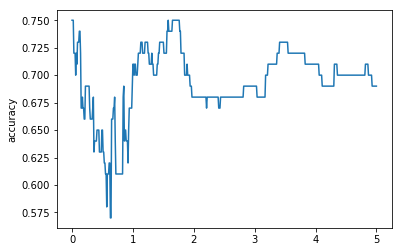

In [72]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, 5.01, 0.01),accuracy)
plt.ylabel('accuracy')
plt.show()

Problem 12
---

$\lambda_{max}$ = 1.700

In [73]:
max_accuracy1 = max(accuracy)
maxLamda_index = np.where(accuracy == max_accuracy1)
print (maxLamda_index)
maxLamda = np.argmax(accuracy)*0.01
print (max_accuracy1, maxLamda)

(array([  0,   1,   2, 158, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176]),)
0.75 0.0


Problem 13
---

In [74]:
R = irl(100, env.PU, env.PD, env.PL, env.PR , 1.70, 0.8, 1, P1)
estimate_reward = np.asarray(R).reshape(10,10)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7517e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.5806e+00 -6.5414e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4493e+00 -1.3338e+01  5e+01  1e-01  5e-01  3e-01
 3:  8.5031e-01 -1.6701e+00  6e+00  2e-02  7e-02  3e-02
 4:  1.3233e-02 -1.9716e-02  7e-02  3e-04  9e-04  3e-04
 5:  1.3223e-04 -1.9702e-04  7e-04  3e-06  9e-06  3e-06
 6:  1.3223e-06 -1.9702e-06  7e-06  3e-08  9e-08  3e-08
 7:  1.3223e-08 -1.9702e-08  7e-08  3e-10  9e-10  3e-10
Optimal solution found.


In [75]:
def heap_map(reward):
    x = np.arange(11)
    y = np.arange(11)
    X, Y = np.meshgrid(x, y)
    plt.pcolor(X, Y, reward, edgecolors='k', linewidths=0.5 )
    plt.colorbar()
    plt.gca().invert_yaxis()

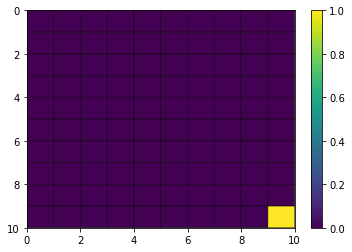

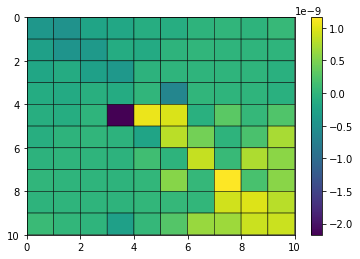

In [76]:
reward_1 = np.zeros((10,10))
reward_1[-1,-1] = 1
plt.figure()
heap_map(reward_1)
plt.figure()
heap_map(estimate_reward)

Problem 14
---

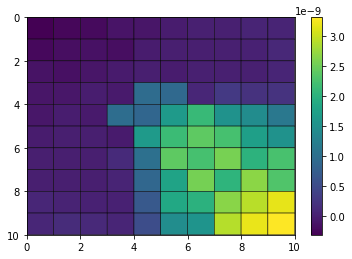

In [77]:
plt.figure()
heap_map(value_iteration(Environment(w=0.1,disc=0.8),R))

Problem 16
---

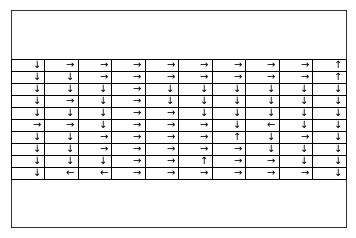

In [78]:
#action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'
arrow_dict = {0:'↑', 1:'↓', 2:'←', 3:'→'}
arrow = optimal_policy(Environment(w=0.1,disc=0.8),R)
arrow = np.asarray(arrow)
arrow_visual = [['↑' for x in range(10)] for y in range(10)]

for i in range(arrow.shape[0]):
    for j in range(arrow.shape[1]):
        arrow_visual[i][j] = arrow_dict[arrow[i][j]]

plt.figure()
tb = plt.table(cellText=arrow_visual, loc=(0,0))
tc = tb.properties()['child_artists']
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()